In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-20.749372549027726 28.651138429157868
-61.52151310892729 100.69257795644262
-51.3703947723898 146.84379203758726
-75.99780679941126 56.346328552550005
85.03787571691382 77.42192075698125
-19.32970273730507 24.61370007364326
-87.69311329312971 75.50763681383421
-30.41807749100481 92.27384147572036
2.8881028459474294 137.7045824210266
-28.304957217252216 -48.134606229442426
-1.3683657210846292 -84.36492280452737
-21.322205700382383 -33.91978055306882
-46.37643927779025 -104.77620721491054
-15.038905025495268 -67.03630625836631
6.653745468023374 81.32308974810451
-12.406628800389655 95.67397386022145
36.98531856840374 164.56745855456091
-69.35264868757031 -28.45542850025717
72.94638848018948 114.5120861395473
28.634184470704696 -128.48348527081464
-10.024688228003512 -57.140041485101676
18.353455909206502 -76.12678587364508
-17.280582533171994 81.32405692152236
54.01909569269037 -43.20826734926095
8.829023218296228 -148.6887088733647
-54.63506077827041 -40.52102692242215
82.0205386589931

-26.32376026258315 146.01705605094565
-56.50336140758076 131.7745408945322
-15.642891643202105 119.76894961179732
42.487218904173886 -96.65181549770149
-77.89584667132041 -165.08833668338576
46.509881731186795 28.589444788020245
2.0847480002502294 -142.8575240363274
-25.47395179071306 -124.85106230707345
49.29904302264714 100.52373932492401
87.48187661063989 41.173234435174834
73.43387929331124 51.24764789166724
-53.239776351064215 130.4675661674321
-4.655226042593696 90.66363419860846
-64.75530929615839 52.20220752408966
49.55692721087502 -165.31520745550682
-65.8203352499049 -23.956239068571165
-85.6648485409904 -130.1675946075586
64.21994614597313 51.51354614519232
-44.96531630701551 -11.023509082802747
-34.12820354247305 -86.1846607466385
11.439766992419422 -31.739891056118097
19.172243126603703 -159.01225179059207
87.31023207059258 1.916786053068904
49.85680708771963 -39.68149143808216
82.20964499818845 141.21231132131527
-50.38589869208058 -173.5051789997725
76.94975813557872 60.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

   # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gwanda
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | gweta
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | biak
Processing Record 9 of Set 1 | imbituba
Processing Record 10 of Set 1 | salinas
Processing Record 11 of Set 1 | caravelas
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | san borja
Processing Record 14 of Set 1 | monaragala
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | alta floresta
Processing Record 21 of Set 1 | port antonio
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | nanortal

City not found. Skipping...
Processing Record 38 of Set 4 | itai
Processing Record 39 of Set 4 | jacareacanga
Processing Record 40 of Set 4 | niono
Processing Record 41 of Set 4 | turka
Processing Record 42 of Set 4 | sorland
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | raudeberg
Processing Record 46 of Set 4 | tigil
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | gladstone
Processing Record 49 of Set 4 | oriximina
Processing Record 50 of Set 4 | hunza
City not found. Skipping...
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | promyshlennyy
Processing Record 4 of Set 5 | huarmey
Processing Record 5 of Set 5 | quiindy
Processing Record 6 of Set 5 | yining
Processing Record 7 of Set 5 | jackson
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | arkhangelsk
Processing Record 10 of Set 

Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | pitimbu
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | buin
Processing Record 33 of Set 8 | aswan
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | saint-leu
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | murchison
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | atambua
Processing Record 40 of Set 8 | bosaso
Processing Record 41 of Set 8 | bulandshahr
Processing Record 42 of Set 8 | honningsvag
Processing Record 43 of Set 8 | kananga
Processing Record 44 of Set 8 | sredec
City not found. Skipping...
Processing Record 45 of Set 8 | clinton
Processing Record 46 of Set 8 | half moon bay
Processing Record 47 of Set 8 | ossora
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | samokov
Processing Record 50 of Set 8 | margate
Processing Record 1 of Set 9 | w

Processing Record 19 of Set 12 | kulhudhuffushi
Processing Record 20 of Set 12 | roald
Processing Record 21 of Set 12 | joensuu
Processing Record 22 of Set 12 | yulara
Processing Record 23 of Set 12 | riyadh
Processing Record 24 of Set 12 | kahului
Processing Record 25 of Set 12 | aykhal
Processing Record 26 of Set 12 | perigueux
Processing Record 27 of Set 12 | grieskirchen
Processing Record 28 of Set 12 | lobito
Processing Record 29 of Set 12 | san policarpo
Processing Record 30 of Set 12 | havoysund
Processing Record 31 of Set 12 | tucurui
Processing Record 32 of Set 12 | utiroa
City not found. Skipping...
Processing Record 33 of Set 12 | ewa beach
Processing Record 34 of Set 12 | shemonaikha
Processing Record 35 of Set 12 | cravo norte
Processing Record 36 of Set 12 | vanimo
Processing Record 37 of Set 12 | san carlos de bariloche
Processing Record 38 of Set 12 | labuan
Processing Record 39 of Set 12 | paso de carrasco
Processing Record 40 of Set 12 | dole
Processing Record 41 of S

In [14]:
len(city_data)

569

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gwanda,-20.9333,29.0000,86.54,30,12,6.98,ZW,2022-11-25 06:37:47
1,Busselton,-33.6500,115.3333,69.39,49,0,12.75,AU,2022-11-25 06:37:48
2,Hobart,-42.8794,147.3294,61.27,72,75,5.75,AU,2022-11-25 06:36:50
3,East London,-33.0153,27.9116,65.34,68,40,9.22,ZA,2022-11-25 06:37:49
4,Dikson,73.5069,80.5464,8.17,94,100,14.54,RU,2022-11-25 06:37:49
5,Gweta,-20.1833,25.2333,84.52,37,91,7.36,BW,2022-11-25 06:37:49
6,Carnarvon,-24.8667,113.6333,73.96,60,0,18.48,AU,2022-11-25 06:37:50
7,Biak,-0.9131,122.8766,82.51,72,99,0.51,ID,2022-11-25 06:37:50
8,Imbituba,-28.2400,-48.6703,61.79,89,25,6.29,BR,2022-11-25 06:37:51
9,Salinas,36.6777,-121.6555,60.82,68,0,8.05,US,2022-11-25 06:34:45


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gwanda,ZW,2022-11-25 06:37:47,-20.9333,29.0000,86.54,30,12,6.98
1,Busselton,AU,2022-11-25 06:37:48,-33.6500,115.3333,69.39,49,0,12.75
2,Hobart,AU,2022-11-25 06:36:50,-42.8794,147.3294,61.27,72,75,5.75
3,East London,ZA,2022-11-25 06:37:49,-33.0153,27.9116,65.34,68,40,9.22
4,Dikson,RU,2022-11-25 06:37:49,73.5069,80.5464,8.17,94,100,14.54
5,Gweta,BW,2022-11-25 06:37:49,-20.1833,25.2333,84.52,37,91,7.36
6,Carnarvon,AU,2022-11-25 06:37:50,-24.8667,113.6333,73.96,60,0,18.48
7,Biak,ID,2022-11-25 06:37:50,-0.9131,122.8766,82.51,72,99,0.51
8,Imbituba,BR,2022-11-25 06:37:51,-28.2400,-48.6703,61.79,89,25,6.29
9,Salinas,US,2022-11-25 06:34:45,36.6777,-121.6555,60.82,68,0,8.05


In [31]:
# Create the output file (CSV).
output_data_file = "World_Weather_Analysis\weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

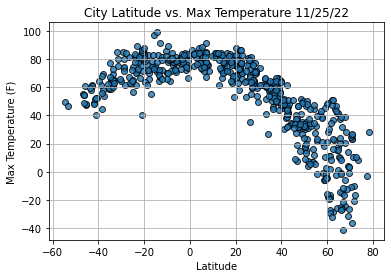

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis\weather_data\Fig1.png")

# Show plot.
plt.show()

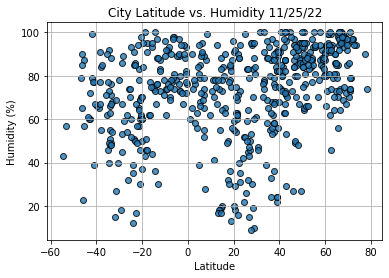

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis\weather_data\Fig2.png")
# Show plot.
plt.show()

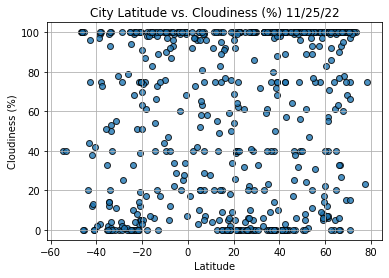

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis\weather_data\Fig3.png")
# Show plot.
plt.show()

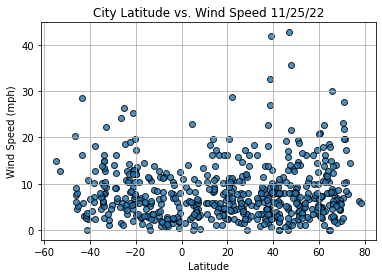

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis\weather_data\Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                   Monaragala
Country                        LK
Date          2022-11-25 06:37:53
Lat                        6.8714
Lng                       81.3487
Max Temp                    84.67
Humidity                       65
Cloudiness                     75
Wind Speed                   3.42
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
564     True
565     True
566    False
567     True
568    False
Name: Lat, Length: 569, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Dikson,RU,2022-11-25 06:37:49,73.5069,80.5464,8.17,94,100,14.54
9,Salinas,US,2022-11-25 06:34:45,36.6777,-121.6555,60.82,68,0,8.05
13,Monaragala,LK,2022-11-25 06:37:53,6.8714,81.3487,84.67,65,75,3.42
15,Severo-Kurilsk,RU,2022-11-25 06:37:54,50.6789,156.1250,31.84,64,100,14.72
17,Saskylakh,RU,2022-11-25 06:37:56,71.9167,114.0833,-10.25,96,100,10.36


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

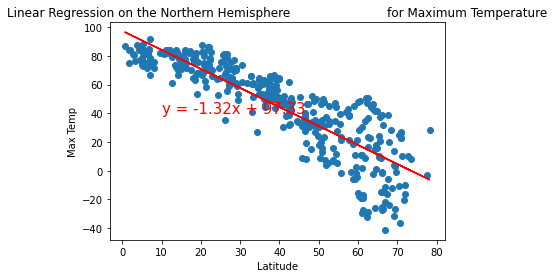

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

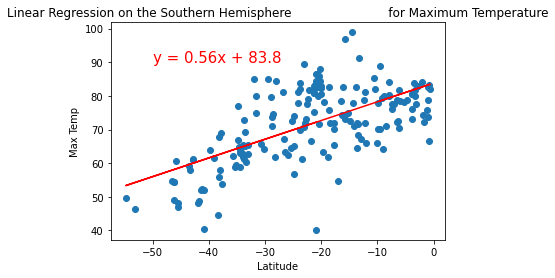

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

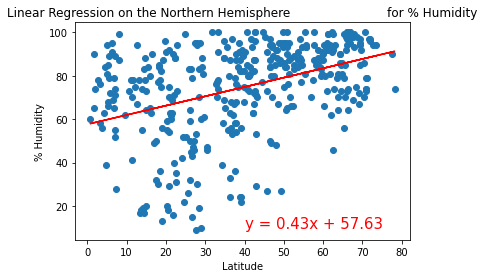

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

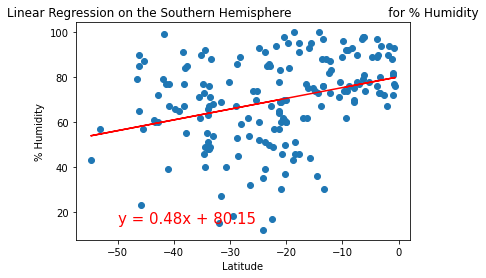

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

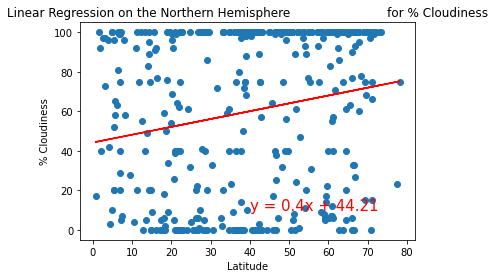

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

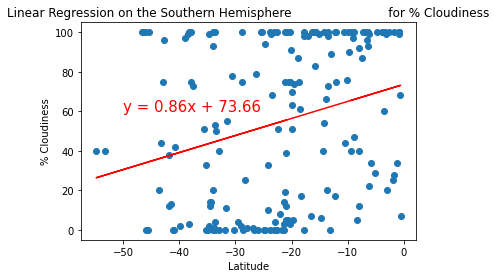

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

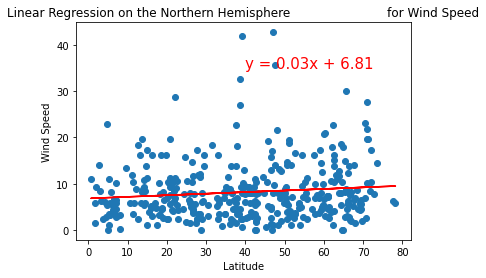

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

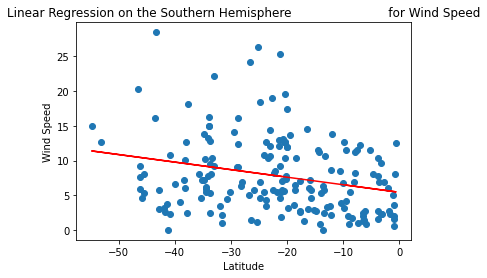

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))